<a href="https://colab.research.google.com/github/tuccib/CUNY_LAG/blob/Analytics/211108_Advertising_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question: Can the an internet user's clicking of an ad be predicted by a combination of Daily Time Spent on Site, Daily Internet Usage, Age, Area Income, and Gender ? Logistic Regression and KNN Models were used to predict the results. 

## Task 1: Environment Set Up

In [1]:
#import libraries
import numpy as np
import pandas as pd

## Task 2: Data Collection

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/advertising.csv')
df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df1.shape

(1000, 10)

In [4]:
df1.describe

<bound method NDFrame.describe of      Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                       68.95   35  ...  2016-03-27 00:53:11              0
1                       80.23   31  ...  2016-04-04 01:39:02              0
2                       69.47   26  ...  2016-03-13 20:35:42              0
3                       74.15   29  ...  2016-01-10 02:31:19              0
4                       68.37   35  ...  2016-06-03 03:36:18              0
..                        ...  ...  ...                  ...            ...
995                     72.97   30  ...  2016-02-11 21:49:00              1
996                     51.30   45  ...  2016-04-22 02:07:01              1
997                     51.63   51  ...  2016-02-01 17:24:57              1
998                     55.55   19  ...  2016-03-24 02:35:54              0
999                     45.01   26  ...  2016-06-03 21:43:21              1

[1000 rows x 10 columns]>

In [5]:
df1.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

BT: There is no null data

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


BT: There are 1,000 rows of data

## Task 3: Data Wrangling and EDA

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

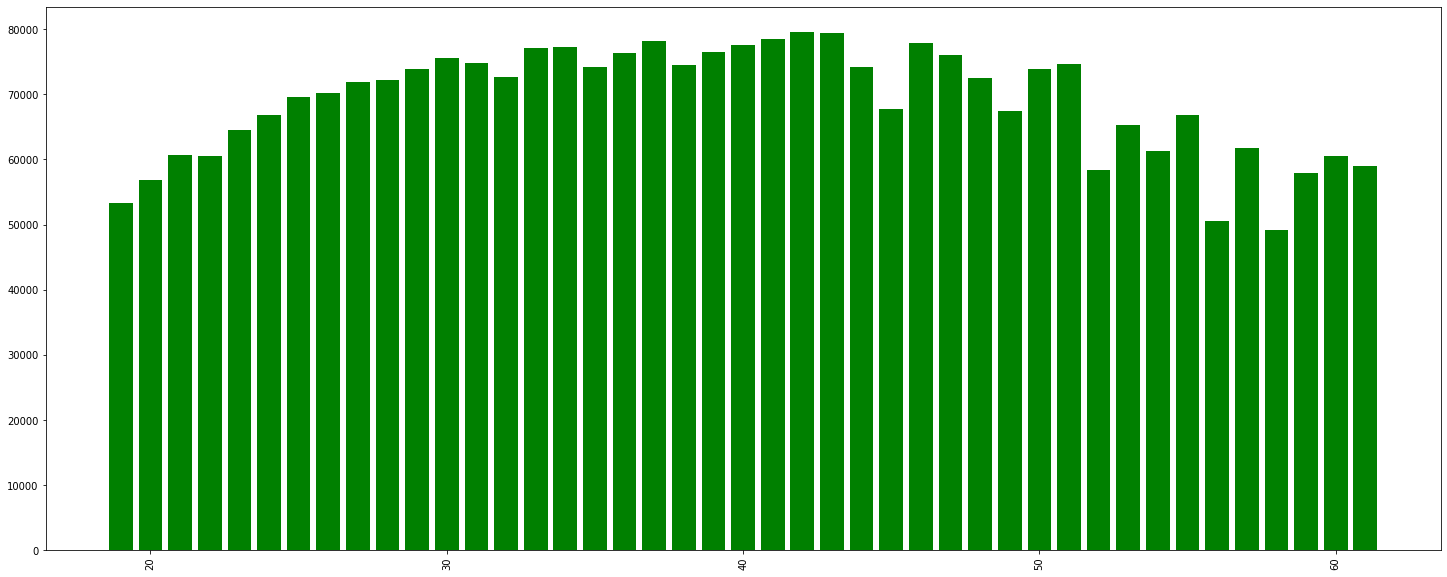

In [9]:
plt.figure(figsize=(25,10))
plt.bar(x=df1['Age'], height=df1['Area Income'], color='green')
plt.xticks(rotation=90)
plt.show()

BT: Plot of Area Income vs Age. Area Income holds fairly steady between ages 30-50 then drops off. 

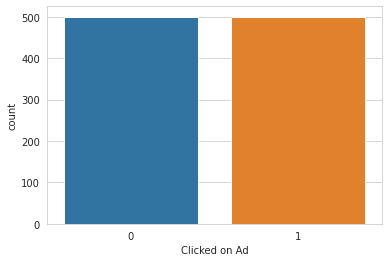

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad', data=df1)

BT: There were 500 clicks and 500 non-clicks for the ads. 

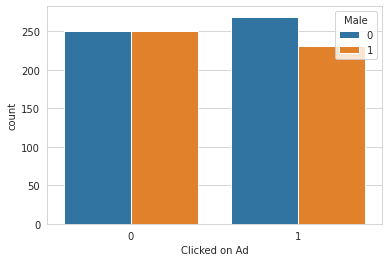

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad', hue='Male', data=df1)

BT: Females were more likely than males to click on the add. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


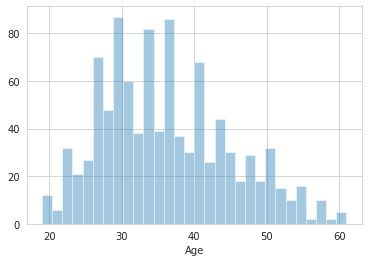

In [12]:
sns.distplot(df1['Age'].dropna(), kde=False, bins=30)

BT: PLot of age distribution of customers. Usage drops off after 45 years. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


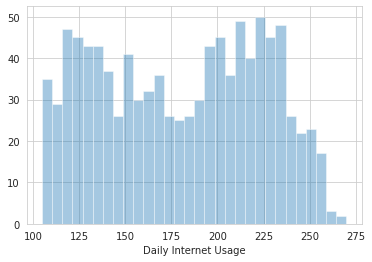

In [13]:
sns.distplot(df1['Daily Internet Usage'].dropna(), kde=False, bins=30)

BT: Plot of daily internet useage (minutes). 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


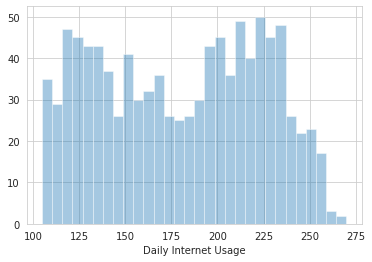

In [14]:
sns.distplot(df1['Daily Internet Usage'].dropna(), kde=False, bins=30)

BT: Plot of Daily Internet Usage (minutes). 

In [15]:
df1.rename(columns={'Daily Time Spent on Site':'Daily Site Time'})

,Daily Site Time,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


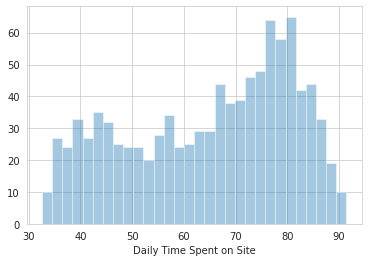

In [16]:
sns.distplot(df1['Daily Time Spent on Site'].dropna(), kde=False, bins=30)

BT: Plot of Daily Time Spent on Site

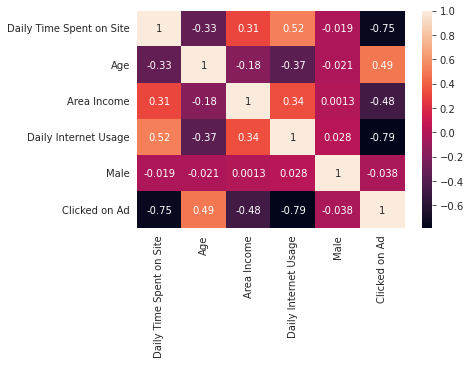

In [18]:
sns.heatmap(df1.corr(), annot=True)

BT: There is a strong negative correlation between Clicked on Ad and Daily Time Spent on Site (-.75). The same holds for Daily Internet Usage (-.79). Age (.49) and Area Income (-.48) had only modest predictive value for Clicked on Ad. 

## Task 4: Data Pre-Processing

In [19]:
train1 = df1

In [20]:
train1.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)

In [21]:
train1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


## Task 5: Model Building

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logReg = LogisticRegression()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = train1[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = train1[['Clicked on Ad']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25) 

In [27]:
logReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = logReg.predict(X_test)

In [29]:
y_pred[0:50]

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1])

In [30]:
y_test.values[0:10]

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [31]:
logReg.score(X_test, y_test)

0.892

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, y_pred)

0.892

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test, y_pred)

array([[113,   9],
       [ 18, 110]])

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       122
           1       0.92      0.86      0.89       128

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



In [38]:
cm = confusion_matrix(y_test, y_pred)

In [39]:
import matplotlib.pyplot as plt

Text(0.5, 15.0, 'predicted value')

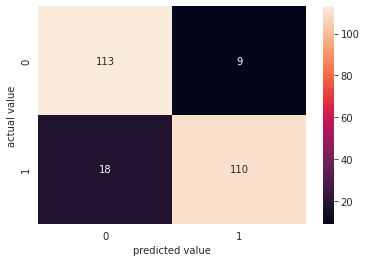

In [40]:
sns.heatmap(cm,annot=True,fmt='0.0f')
plt.ylabel('actual value')
plt.xlabel('predicted value')


TN: 113/(113 + 9) = .93
TP: 110/(110 + 18) = .86

The combination of Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, and Male was able to predict with 89% accuracy whether the internet user would click the ad.

## KNN Data Pre Processing


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scalar = StandardScaler()

In [50]:
scalar.fit(train1.drop('Clicked on Ad', axis=1))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
scaled_features = scalar.transform(train1.drop('Clicked on Ad', axis=1))

In [52]:
std_data = pd.DataFrame(scaled_features, columns=train1.columns[:-1])

In [53]:
std_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695


BT: The data has been scaled down for purposes of the KNN Model because variables on a larger scale will have too much of an effect on the distance between the observations. 

## KNN Model Building

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, train1['Clicked on Ad'])

In [56]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 5)
(250, 5)
(750,)
(250,)


In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=1)

In [59]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [60]:
y_pred = knn.predict(x_test)

In [61]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1])

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[116,   5],
       [ 12, 117]])

In [65]:
score = knn.score(x_test, y_test)
score

0.932

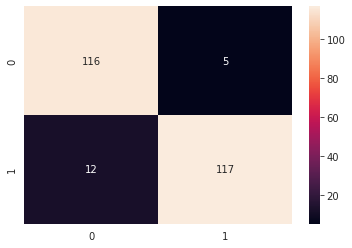

In [66]:
sns.heatmap(cm, annot=True, fmt='0.0f')

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       121
           1       0.96      0.91      0.93       129

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



BT: The overall accuracy of the KNN model is .93, which is higher than the .89 generated by the Logistic Regression model. 

## KNN with K=5

In [68]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [69]:
knn5.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
y_pred_knn5 = knn5.predict(x_test)

In [72]:
y_pred_knn5

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1])

In [73]:
score_knn5 = knn5.score(x_test, y_test)
score_knn5

0.948

BT: The accuracy score increased from .93 to .948 when 5 nearest neighbors were included. 

## K Value and Accuracy

In [74]:
import numpy as np

In [75]:
from sklearn import metrics

In [76]:
score = []

In [77]:
for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test, y_pred))
  print(score)

[0.932]
[0.932, 0.936]
[0.932, 0.936, 0.936]
[0.932, 0.936, 0.936, 0.94]
[0.932, 0.936, 0.936, 0.94, 0.948]
[0.932, 0.936, 0.936, 0.94, 0.948, 0.944]
[0.932, 0.936, 0.936, 0.94, 0.948, 0.944, 0.948]
[0.932, 0.936, 0.936, 0.94, 0.948, 0.944, 0.948, 0.948]
[0.932, 0.936, 0.936, 0.94, 0.948, 0.944, 0.948, 0.948, 0.948]
[0.932, 0.936, 0.936, 0.94, 0.948, 0.944, 0.948, 0.948, 0.948, 0.948]
[0.932, 0.936, 0.936, 0.94, 0.948, 0.944, 0.948, 0.948, 0.948, 0.948, 0.948]
[0.932, 0.936, 0.936, 0.94, 0.948, 0.944, 0.948, 0.948, 0.948, 0.948, 0.948, 0.944]
[0.932, 0.936, 0.936, 0.94, 0.948, 0.944, 0.948, 0.948, 0.948, 0.948, 0.948, 0.944, 0.944]
[0.932, 0.936, 0.936, 0.94, 0.948, 0.944, 0.948, 0.948, 0.948, 0.948, 0.948, 0.944, 0.944, 0.944]
[0.932, 0.936, 0.936, 0.94, 0.948, 0.944, 0.948, 0.948, 0.948, 0.948, 0.948, 0.944, 0.944, 0.944, 0.948]
[0.932, 0.936, 0.936, 0.94, 0.948, 0.944, 0.948, 0.948, 0.948, 0.948, 0.948, 0.944, 0.944, 0.944, 0.948, 0.952]
[0.932, 0.936, 0.936, 0.94, 0.948, 0.944, 0.9

Text(0, 0.5, 'Accuracy Score')

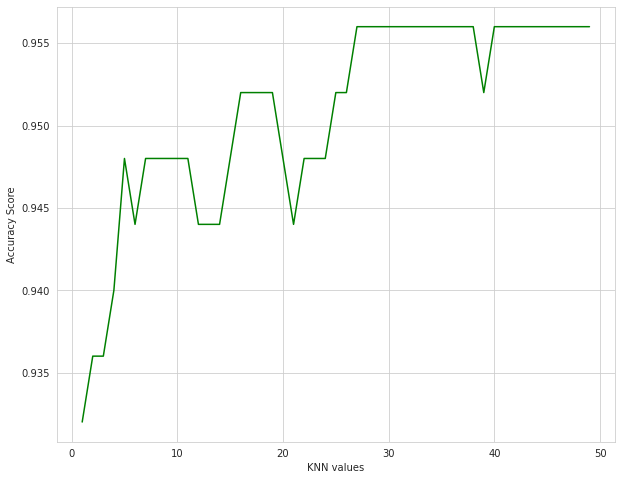

In [78]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), score, color='green')
plt.xlabel('KNN values')
plt.ylabel('Accuracy Score')

BT: The accuracy score increased from .932 to .958 as the number of nearest neighbors increased from 1 to 50. 

## Error rate and K Value

In [79]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error rate')

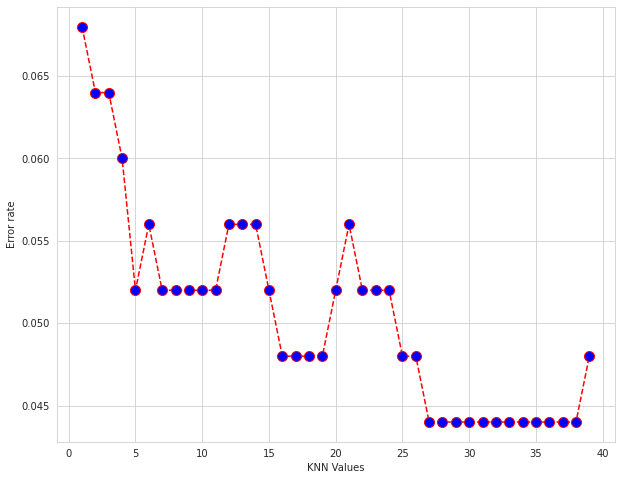

In [80]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40), error_rate, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('KNN Values')
plt.ylabel('Error rate')

BT: The error rate went down from .067 to .045 as the number of nearest neighbors increased from 1 to 40. 